In [28]:
import albumentations as A
import cv2
import numpy as np

In [3]:
image = cv2.imread("/media/jess/DATA/PhD/data/ecoflow/yolo_labels/14_classes (copy 1)/10_img/images/001B_2017_Hook_IMG_0022_d0a6e9bc.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [92]:
box_path = '/media/jess/DATA/PhD/data/ecoflow/yolo_labels/14_classes (copy 1)/10_img/labels/001B_2017_Hook_IMG_0022_d0a6e9bc.txt'
box_text = open(box_path, 'r')
box_text = box_text.readline().replace('\n', '').split(' ')
bbox = box_text[1:] + [box_text[0]]
bbox = [list(np.float_(bbox))]
labels = [bbox[0][-1]]

In [90]:
transform = A.Compose([
    A.RandomCrop(512, 512),
    A.RandomBrightnessContrast(p=0.3),
    A.HorizontalFlip(p=0.5),
], bbox_params=A.BboxParams(format='yolo', label_fields=['labels']))

In [94]:
transformed = transform(image=image, bboxes=bbox, labels=labels)
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']


In [101]:
transformed_image

array([[[48, 48, 48],
        [53, 53, 53],
        [50, 50, 50],
        ...,
        [ 3,  3,  3],
        [ 5,  5,  5],
        [ 6,  6,  6]],

       [[53, 53, 53],
        [53, 53, 53],
        [51, 51, 51],
        ...,
        [ 0,  0,  0],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[57, 57, 57],
        [55, 55, 55],
        [53, 53, 53],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[77, 77, 77],
        [79, 79, 79],
        [83, 83, 83],
        ...,
        [14, 14, 14],
        [15, 15, 15],
        [12, 12, 12]],

       [[77, 77, 77],
        [81, 81, 81],
        [84, 84, 84],
        ...,
        [10, 10, 10],
        [13, 13, 13],
        [12, 12, 12]],

       [[77, 77, 77],
        [86, 86, 86],
        [88, 88, 88],
        ...,
        [ 9,  9,  9],
        [12, 12, 12],
        [11, 11, 11]]], dtype=uint8)

In [103]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def plot_image_with_bboxes(image, bboxes, labels):
    # Create a figure and a set of subplots
    fig, ax = plt.subplots(1)
    
    # Display the image
    ax.imshow(image)
    
    # Now, loop through the bboxes and add them to the plot
    for bbox, label in zip(bboxes, labels):
        # Extract the bounding box details
        x_center, y_center, width, height, class_id = bbox
        # Convert from YOLO format to matplotlib format
        # YOLO format: [x_center, y_center, width, height, class_id]
        # Matplotlib format: [x_min, y_min, width, height]
        x_min = (x_center - width / 2) * image.shape[1]
        y_min = (y_center - height / 2) * image.shape[0]
        
        # Create a rectangle patch
        rect = patches.Rectangle((x_min, y_min), width * image.shape[1], height * image.shape[0],
                                 linewidth=1, edgecolor='r', facecolor='none', label=f'Class {int(class_id)}')
        
        # Add the rectangle to the Axes
        ax.add_patch(rect)
    
    # Add legend
    ax.legend(loc='upper left')
    
    # Show the plot
    plt.show()


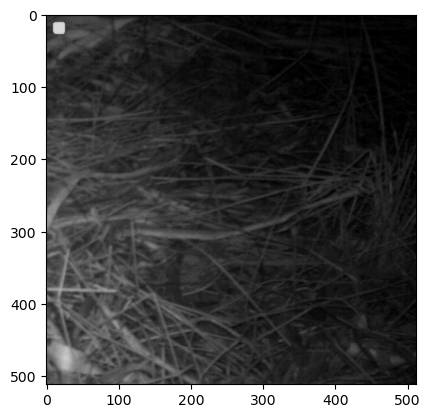

In [104]:
# Assuming 'transformed_image' is your image array from Albumentations and 'transformed_bboxes' contains the bounding boxes
plot_image_with_bboxes(transformed_image, transformed_bboxes, [bbox[-1] for bbox in transformed_bboxes])